In [1]:
## In this module we will implement the Bagging concept, along with other techniques like pasting, random Subspaces
## Random Patches
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [2]:
x,y = make_classification(n_samples=10000, n_features=10,n_informative=3)

In [3]:
x.shape

(10000, 10)

In [4]:
y.shape

(10000,)

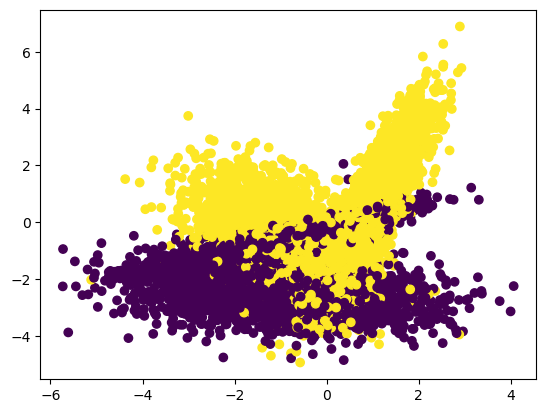

In [5]:
# Ploting the visual
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [6]:
# Splitting the dataset

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=4)

## Decision Tree

In [7]:
## Using with Single Decision Tree

dt = DecisionTreeClassifier(random_state=4)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

print('Decision Tree Accuracy : ', accuracy_score(y_test,y_pred))

Decision Tree Accuracy :  0.9155


## Bagging

In [13]:
bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       n_estimators=500,
                       max_samples=0.25,
                       bootstrap=True,
                       random_state=4)

In [14]:
bag.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, random_state=4)

In [15]:
y_pred_bag = bag.predict(x_test)

print('Bagging Accuracy with DT : ', accuracy_score(y_test, y_pred_bag))

Bagging Accuracy :  0.9315


In [16]:
## To check how many rows are assisgned to each DT

bag.estimators_samples_[0].shape ## 2000 rows coz we have selected max_sample as 0.25 i.e 25% of 8000 (len(x))

(2000,)

In [17]:
## To check how many columns are assisgned to each DT

bag.estimators_features_[0].shape

(10,)

In [18]:
## Since we are using Row sampling so we are taking all 10 columns

## Bagging using SVM

In [21]:
bag_svc = BaggingClassifier(base_estimator=SVC(),
                       n_estimators=500,
                       max_samples=0.25,
                       bootstrap=True,
                       random_state=4)

In [22]:
bag_svc.fit(x_train, y_train)

BaggingClassifier(base_estimator=SVC(), max_samples=0.25, n_estimators=500,
                  random_state=4)

In [26]:
y_pred_bag_svc = bag_svc.predict(x_test)

In [27]:
print('Bagging Accuracy with SVC : ', accuracy_score(y_test, y_pred_bag_svc))

Bagging Accuracy with SVC :  0.86


In [ ]:
## So the Accuracy is reduced using SVM as an estimator for Base Models

## Pasting

In [28]:
# In pasting everything will remain same only we put Boostrap to False

pasting = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       n_estimators=500,
                       max_samples=0.25,
                       bootstrap=False,
                       random_state=4, verbose=-1, n_jobs=-1)

In [29]:
pasting.fit(x_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    8.4s finished


BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  max_samples=0.25, n_estimators=500, n_jobs=-1, random_state=4,
                  verbose=-1)

In [30]:
y_pred_past = pasting.predict(x_test)

print('Pasting Accuracy : ', accuracy_score(y_test,y_pred_past))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Pasting Accuracy :  0.9325


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.5s finished


In [31]:
## So accuracy is improved as compare to Bagging with DT

## Random Subspaces

In [33]:
## In Random Subspaces, we do Random Sampling on Columns, Not on Rows so we will take all the rows so 
## max_samples = 1.0,
## bootstrap_feature = False means Random Sampling Column Wise Without Replacement
## bootstrap_feature = True means Random Sampling Column Wise With Replacement
## max_features = 0.5, as in 500 DT will have only 5 columns out of 10

rand_s = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       n_estimators=500,
                       max_samples=1.0,
                       bootstrap=False,
                       max_features=0.5,
                       bootstrap_features=True,
                       random_state=4, verbose=-1, n_jobs=-1)

rand_s.fit(x_train,y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   14.6s finished


BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  bootstrap_features=True, max_features=0.5, n_estimators=500,
                  n_jobs=-1, random_state=4, verbose=-1)

In [34]:
y_pred_rand_s = rand_s.predict(x_test)

print('Random Subspaces Accuracy : ',accuracy_score(y_test, y_pred_rand_s))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Random Subspaces Accuracy :  0.924


[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.2s finished


In [35]:
## So accuracy is coming around to be 92.4% i.e is lower than pasting and Bagging with DT

In [37]:
rand_s.estimators_samples_[0].shape

(8000,)

In [38]:
## 8000 as we are taking all the rows/samples

In [39]:
rand_s.estimators_features_[0].shape

(5,)

In [41]:
## Only 5 features so Random_Sampling Columns Wise is Working Fine here.

## Random Patches

In [42]:
## In this technique we use column sampling along with row sampling.

## max_samples=, bootstrap= , max_feautures=, bootstrap_feaures= , these all parameters will be used.

rand_P = BaggingClassifier(base_estimator=DecisionTreeClassifier(), 
                          n_estimators=500,
                           max_samples=0.25,
                          bootstrap=True,
                          max_features=0.5,
                          bootstrap_features=True,
                          random_state=4, 
                          verbose=True,
                          n_jobs=-1)

rand_P.fit(x_train,y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    5.0s remaining:    5.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    5.1s finished


BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                  bootstrap_features=True, max_features=0.5, max_samples=0.25,
                  n_estimators=500, n_jobs=-1, random_state=4, verbose=True)

In [43]:
y_pred_rand_P = rand_P.predict(x_test)

print('Random Patches Accuracy : ',accuracy_score(y_test, y_pred_rand_P))

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


Random Patches Accuracy :  0.92


[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    0.5s finished


In [ ]:
## So Accuracy Further gets reduce to 92.0%

## OOB Score

In [44]:
## OOB - Out of Bags are defined as those samples which are never the part of Base Estimator which model training
## OOB score can be also used to evaluate the model performance as its will be an unseen data that Model didn't see

## OOB Score can be calculated by setting up a hyperparamet to True with the name of OOB_score

bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                       n_estimators=500,
                       max_samples=0.25,
                       bootstrap=True,
                       oob_score=True,  ## Setting True
                       random_state=4)

bag.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, oob_score=True, random_state=4)

In [45]:
bag.oob_score_ ## 92.77%

0.92775

In [46]:
## It gives us the Idea about how close the accuracy score will be

In [47]:
y_pred_bag1 = bag.predict(x_test)

print('Baggin Accuracy with DT : ',accuracy_score(y_test,y_pred_bag1))

Baggin Accuracy with DT :  0.9315


In [ ]:
## So its they are close. 

In [48]:
## Bagging Tips

# Bagging generally gives better result than Pasting.
# Good Results comes around the 25% to 50% row sampling mark.
# Random Patches and Random Subspaces (COLUMN SAMPLING) should be used while dealing with High Dimension Data
# To find the correct Hyperparameter values we can use GridSearchCV or RandomSearchCV

## Applying GridSearchCV

In [51]:
from sklearn.model_selection import GridSearchCV

prams = {'n_estimators' : [100,200,300,500],
        'max_samples': [0.1,0.20,0.40,0.6,0.7,1.0],
        'max_features' : [0.1,0.3,0.4,0.6,0.8,1.0],
        'bootstrap':[True, False]}
search = GridSearchCV(BaggingClassifier(), param_grid=prams, cv = 5, verbose=True, n_jobs=-1,scoring='f1')

search.fit(x_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.1, 0.3, 0.4, 0.6, 0.8, 1.0],
                         'max_samples': [0.1, 0.2, 0.4, 0.6, 0.7, 1.0],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='f1', verbose=True)

In [52]:
search.best_estimator_

BaggingClassifier(n_estimators=200)

In [53]:
search.best_params_

{'bootstrap': True,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 200}

In [54]:
search.best_score_

0.9328157153763309

In [ ]:
## So these are our best parameters and best score obtain with the GridSearchCV()